# 数据读取和准备工作

In [1]:
import shap
import pandas as pd
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
shap.initjs()

print("start")

basepath="D:\OneDrive - whut.edu.cn\活动文件\大三\大三下活动文件\数据统计与分析竞赛\代码"
modelame = "LR.pkl"

train_XGB = pd.read_csv(f"{basepath}/Data/EnsembleGeneration/oof_train_XGB.csv")
train_RF = pd.read_csv(f"{basepath}/Data/EnsembleGeneration/oof_train_RF.csv")

test_XGB = pd.read_csv(f"{basepath}/Data/EnsembleGeneration/oof_test_XGB.csv")
test_RF = pd.read_csv(f"{basepath}/Data/EnsembleGeneration/oof_test_RF.csv")

y_train = pd.read_csv(f"{basepath}/Data/EnsembleGeneration/train.csv")
y_test = pd.read_csv(f"{basepath}/Data/EnsembleGeneration/test.csv")

x1 = pd.concat([train_XGB,train_RF],axis=1)
x2 = pd.concat([test_XGB,test_RF],axis=1)

# print(x1)
# print(x2)
x=pd.concat([x1,x2])
y=pd.concat([y_train,y_test])

model=joblib.load(f"{basepath}/Predict/Model/EnsembleGeneration/0.75217-0.77966/LR.pkl")

explainer = shap.Explainer(model,x)
shap_values = explainer(x)
print("done!")

D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

start
done!


## summary plot

In [2]:
shap.summary_plot(shap_values, x)

start


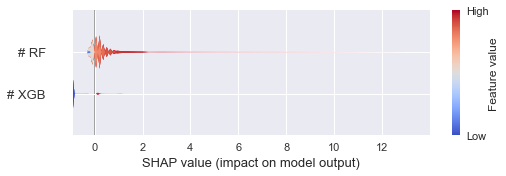

In [3]:
print("start")
shap.summary_plot(shap_values,x, plot_type="layered_violin",color='coolwarm')

## dependence plot

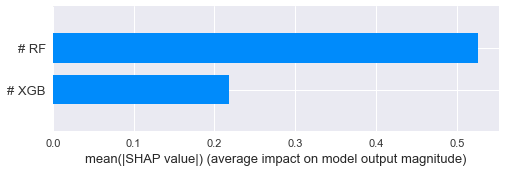

In [4]:
shap.summary_plot(shap_values, x, plot_type="bar")

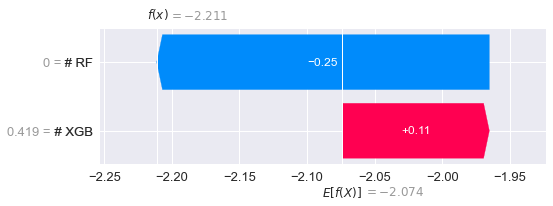

In [5]:
shap.plots.waterfall(shap_values[0])

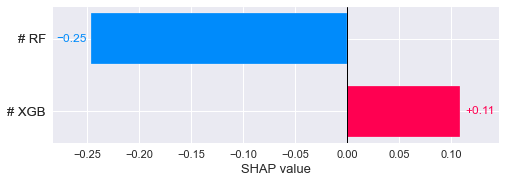

In [6]:
shap.plots.bar(shap_values[0])

In [7]:
shap.plots.force(shap_values[1])

In [8]:
shap.dependence_plot(shap_values[:,"coupon"], color=shap_values)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

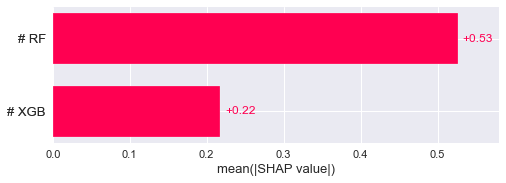

In [15]:
shap.plots.bar(shap_values)

In [16]:
# for name in x.columns:
#     shap.dependence_plot(name, shap_values, x)